<a href="https://colab.research.google.com/github/Harshavardhan88/ELEVATELABS-TASK7/blob/main/task7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1: Load and Prepare Dataset

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA


In [11]:
df = pd.read_csv('breast-cancer.csv')
df.columns = df.columns.str.strip()
print("Columns:", df.columns.tolist())
print(df.head())


Columns: ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20

In [12]:
if 'diagnosis' in df.columns:
    df['target'] = df['diagnosis'].map({'M': 1, 'B': 0})
else:
    raise ValueError("Target column 'diagnosis' not found. Please check column names.")


df = df.drop(columns=[col for col in df.columns if 'id' in col.lower() or 'Unnamed' in col], errors='ignore')
df = df.drop(columns=['diagnosis'])

X = df.drop('target', axis=1)
y = df['target']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# 2: Train SVM (Linear and RBF)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X_train, y_train)

svm_rbf = SVC(kernel='rbf', C=1, gamma='scale')
svm_rbf.fit(X_train, y_train)

y_pred_linear = svm_linear.predict(X_test)
y_pred_rbf = svm_rbf.predict(X_test)

print("Linear SVM Accuracy:", accuracy_score(y_test, y_pred_linear))
print("RBF SVM Accuracy:", accuracy_score(y_test, y_pred_rbf))
print("\nClassification Report (RBF):\n", classification_report(y_test, y_pred_rbf))


Linear SVM Accuracy: 0.956140350877193
RBF SVM Accuracy: 0.9736842105263158

Classification Report (RBF):
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



# 3: Visualize Decision Boundaries (2D)

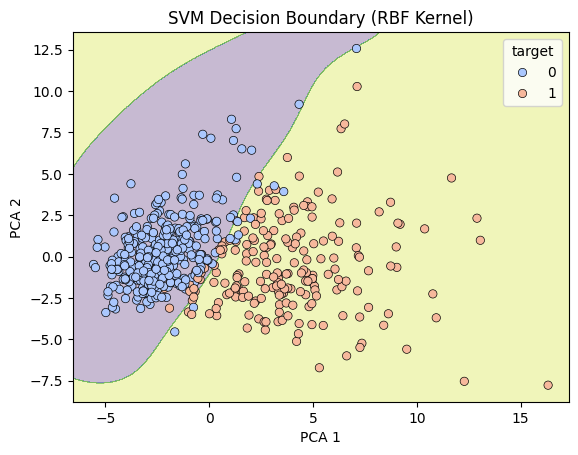

In [14]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

svm_rbf_pca = SVC(kernel='rbf', C=1, gamma='scale')
svm_rbf_pca.fit(X_pca, y)

def plot_decision_boundary(clf, X, y):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='coolwarm', edgecolor='k')
    plt.title('SVM Decision Boundary (RBF Kernel)')
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.show()

plot_decision_boundary(svm_rbf_pca, X_pca, y)


# 4: Hyperparameter Tuning

In [15]:
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.001],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best CV Score:", grid.best_score_)

y_pred_best = grid.predict(X_test)
print("Test Accuracy (Best Model):", accuracy_score(y_test, y_pred_best))


Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best CV Score: 0.9736263736263737
Test Accuracy (Best Model): 0.9736842105263158


# 5: Cross-validation

In [16]:
cv_scores = cross_val_score(SVC(kernel='rbf', C=1, gamma='scale'), X_scaled, y, cv=5)
print("Cross-validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))


Cross-validation Scores: [0.97368421 0.95614035 1.         0.96491228 0.97345133]
Mean CV Accuracy: 0.9736376339077782
